<a href="https://colab.research.google.com/github/jedidahwavinya/Linear_Regression/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Car Price Prediction 🚗**

Step1: Problem Understanding
* Define the problem:
•	Predict used car prices from features like mileage, brand, year of manufacture, and engine size.

Step2: Import the necessary libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

Step3: Load the Data

In [27]:
url ="https://raw.githubusercontent.com/jedidahwavinya/Linear_Regression/refs/heads/main/cardekho.csv"
df=pd.read_csv(url)

Step4: Data Exploration

In [28]:
#preview the dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [29]:
#Check the dataset shape
df.shape

(8128, 12)

(8128, 12)

In [30]:
#Explore the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


Check for missing values

In [31]:
# Check for missing values
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [32]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 1202
Number of duplicate rows: 1202


Step5: Data Processing

In [33]:
# Handle missing values by filling with the median
for col in ['mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']:
    if df[col].dtype != 'object': # Check if the column is not of object type
        df[col] = df[col].fillna(df[col].median())

# For 'max_power', which is an object type and contains non-numeric values,
# Convert it to numeric first, coercing errors, and then fill NaNs with the median.
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['max_power'] = df['max_power'].fillna(df['max_power'].median())

In [34]:
# Verify that there are no more missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64
Missing values after handling:
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


In [35]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows after removal: 0
Number of duplicate rows after removal: 0


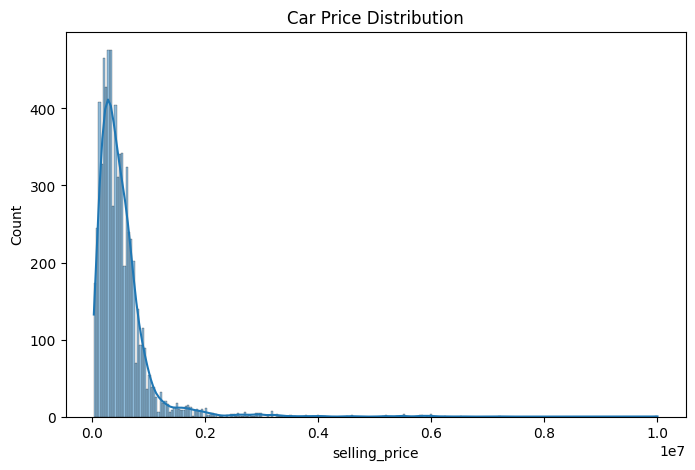

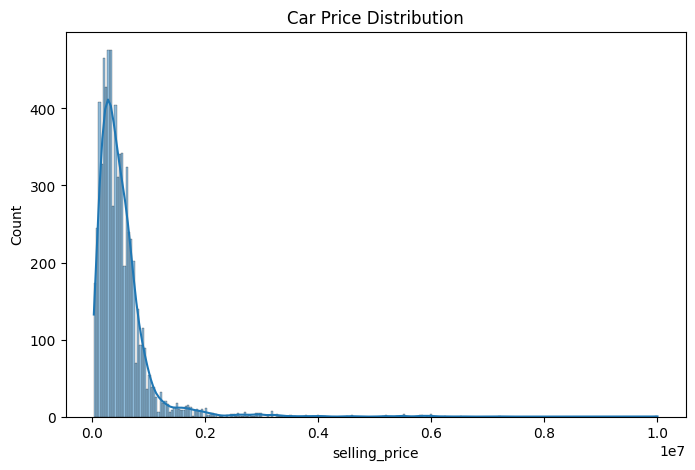

In [36]:
# Visualize price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], kde=True)
plt.title("Car Price Distribution")
plt.show()

Step6: Feature Selection & Preprocessing

In [37]:
# Define features (X) and target (y)
X = df.drop(['name', 'selling_price'], axis=1)
y = df['selling_price']

In [38]:
# Identify categorical and numerical features
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
numerical_features = ['year', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']

# Create transformers for preprocessing
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore' will handle unseen categories during testing

# Create a column transformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) - though in this case, all relevant columns are explicitly listed
)

In [39]:
# Create a preprocessing pipeline (optional but good practice)
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = preprocessing_pipeline.fit_transform(X)

# Display the shape of the processed features
print("Shape of processed features:", X_processed.shape)

Shape of processed features: (6926, 20)
Shape of processed features: (6926, 20)


Step7: Train-test split

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5540, 20)
Shape of X_test: (1386, 20)
Shape of y_train: (5540,)
Shape of y_test: (1386,)
Shape of X_train: (5540, 20)
Shape of X_test: (1386, 20)
Shape of y_train: (5540,)
Shape of y_test: (1386,)


Step8: Build the Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([ 397152.27447992, 1201090.20626615,  777598.44594206, ...,
        114495.68531678,  738912.22219983,  753870.52980799])

array([ 397152.27447992, 1201090.20626615,  777598.44594206, ...,
        114495.68531678,  738912.22219983,  753870.52980799])

Model Evaluation

In [43]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 99130982896.96982
Root Mean Squared Error: 314850.7311361525
R-squared: 0.5480109107120685
Mean Squared Error: 99130982896.96982
Root Mean Squared Error: 314850.7311361525
R-squared: 0.5480109107120685


Step9: Visualize the Predictions

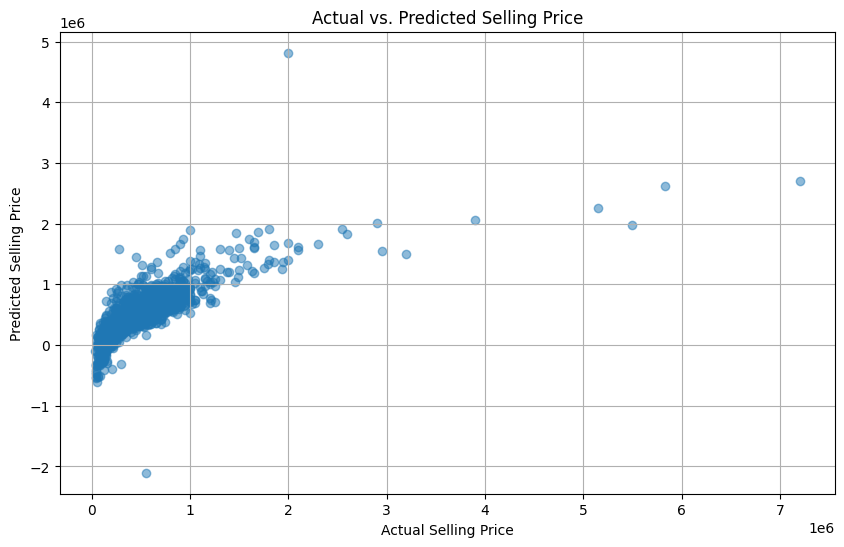

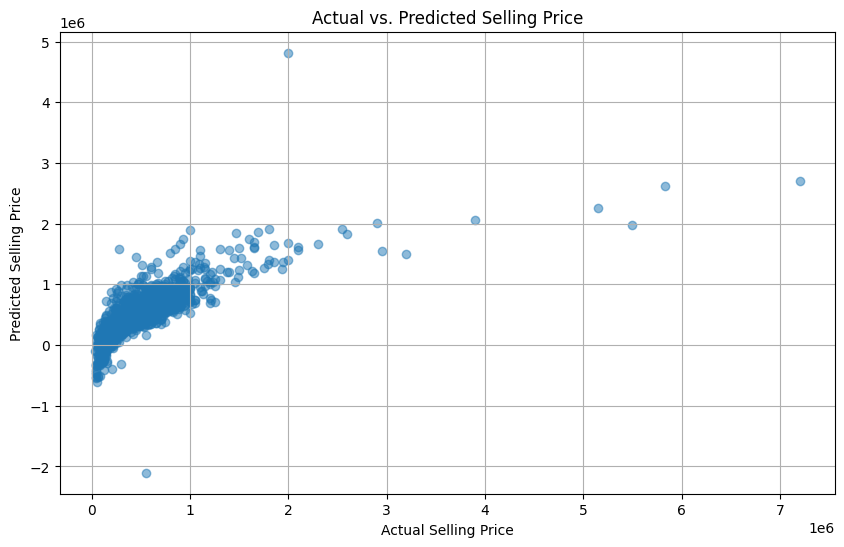

In [44]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price")
plt.grid(True)
plt.show()

Step10: Model Interpretation

In [45]:
# Get the coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_

# Get the feature names after one-hot encoding
feature_names = numerical_features + list(preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))

# Create a DataFrame to display coefficients with their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients and intercept
print("Model Intercept:")
print(intercept)
print("\nModel Coefficients:")
display(coefficients_df)

Model Intercept:
1323202.5746707737

Model Coefficients:


,Feature,Coefficient
0,year,1.235768e+05
1,km_driven,-5.720102e+04
2,mileage(km/ltr/kg),1.414263e+04
3,engine,3.666603e+04
4,max_power,2.625001e+05
5,seats,-7.378287e+03
6,fuel_CNG,-2.071945e+04
7,fuel_Diesel,1.288036e+04
8,fuel_LPG,7.959269e+04
9,fuel_Petrol,-7.175360e+04


Model Intercept:
1323202.5746707737

Model Coefficients:


,Feature,Coefficient
0,year,1.235768e+05
1,km_driven,-5.720102e+04
2,mileage(km/ltr/kg),1.414263e+04
3,engine,3.666603e+04
4,max_power,2.625001e+05
5,seats,-7.378287e+03
6,fuel_CNG,-2.071945e+04
7,fuel_Diesel,1.288036e+04
8,fuel_LPG,7.959269e+04
9,fuel_Petrol,-7.175360e+04


Step11: Test with new data

In [46]:
new_data = pd.DataFrame({
    'year': [2022],
    'km_driven': [15000],
    'fuel': ['Petrol'],
    'seller_type': ['Individual'],
    'transmission': ['Manual'],
    'owner': ['First Owner'],
    'mileage(km/ltr/kg)': [20.0],
    'engine': [1200.0],
    'max_power': [85.0],
    'seats': [5.0]
})

# Apply the same preprocessing pipeline to the new data
new_data_processed = preprocessing_pipeline.transform(new_data)

# Make a prediction using the trained model
predicted_price = model.predict(new_data_processed)

print(f"Predicted selling price for the new car: {predicted_price[0]:,.2f}")

Predicted selling price for the new car: 737,574.25
Predicted selling price for the new car: 737,574.25


Step11: Save The model

* Using joblib

In [47]:
import joblib

# Define the filename for the saved model
filename = 'linear_regression_car_price_model.joblib'

# Save the model to the file
joblib.dump(model, filename)

print(f"Model saved as {filename}")

Model saved as linear_regression_car_price_model.joblib
Model saved as linear_regression_car_price_model.joblib


* Using Pickle

In [48]:
import pickle

# Assume your model is trained and stored in a variable called 'model'
# Save model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load model later
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

**Car price prediction app**

In [50]:
%%writefile app.py

#!pip install streamlit
import streamlit as st
import pickle
import numpy as np

# Load trained model
model = pickle.load(open("model.pkl", "rb"))

# App title
st.title("🚗 Car Price Prediction App")

st.write("Fill in the details below to predict the car price.")

st.header("Enter Car Details:")

# Create input fields for each feature
year = st.number_input("Year", min_value=1980, max_value=2024, value=2015)
km_driven = st.number_input("Kilometers Driven", min_value=0, value=50000)
fuel = st.selectbox("Fuel Type", ['Petrol', 'Diesel', 'CNG', 'LPG'])
seller_type = st.selectbox("Seller Type", ['Individual', 'Dealer', 'Trustmark Dealer'])
transmission = st.selectbox("Transmission", ['Manual', 'Automatic'])
owner = st.selectbox("Owner Type", ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'])
mileage = st.number_input("Mileage (km/ltr/kg)", min_value=0.0, value=18.0)
engine = st.number_input("Engine (CC)", min_value=0.0, value=1200.0)
max_power = st.number_input("Max Power (bhp)", min_value=0.0, value=80.0)
seats = st.number_input("Number of Seats", min_value=1.0, value=5.0)

# Create a button to trigger prediction
if st.button("Predict Price"):
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        'year': [year],
        'km_driven': [km_driven],
        'fuel': [fuel],
        'seller_type': [seller_type],
        'transmission': [transmission],
        'owner': [owner],
        'mileage(km/ltr/kg)': [mileage],
        'engine': [engine],
        'max_power': [max_power],
        'seats': [seats]
    })

    # Apply preprocessing to the input data
    input_data_processed = preprocessing_pipeline.transform(input_data)

    # Make a prediction
    predicted_price = loaded_model.predict(input_data_processed)

    # Display the prediction
    st.subheader("Predicted Selling Price:")
    st.write(f"₹ {predicted_price[0]:,.2f}")


Overwriting app.py


Run Locally

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.93.116:8501

